# IMPORTING LIBRARIES

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
import plotly.graph_objs as go
import plotly as py
font = {'size'   : 14}
matplotlib.rc('font', **font)

# 1. PROBLEM STATEMENT

Every customer has different requirements and require a specific marketing effort to address them appropriately. Companies aim to gain a deeper approach of the customer they are targeting. Therefore, their aim has to be specific and should be tailored to address the requirements of each and every individual customer. Furthermore, through the data collected, companies want to gain a deeper understanding of customer preferences as well as the requirements for discovering valuable segments that would reap them maximum profit. This way, they can strategize their marketing techniques more efficiently and minimize the possibility of risk to their investment.

# 2. LOADING DATASET

In [38]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Lets look at the columns

- **CustomerID** - Unique ID assigned to the customer
- **Gender** - Gender of the customer
- **Age** - Age of the customer
- **Annual Income (k$)** - Annual Income of the customee
- **Spending Score (1-100)** - Score assigned by the mall based on customer behavior and spending nature

# 3. EDA

In [4]:
cont_cols = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
cat_cols = ['Gender'] 

## 3.0 MISSING VALUES

In [5]:
print("COLUMNS".ljust(30) + "COUNT".ljust(10) + "%")
for i in df.columns:
    print(i.ljust(30) + str(df[i].isna().sum()).ljust(10) + str(round(df[i].isna().sum() / len(df), 2) * 100))

COLUMNS                       COUNT     %
CustomerID                    0         0.0
Gender                        0         0.0
Age                           0         0.0
Annual Income (k$)            0         0.0
Spending Score (1-100)        0         0.0


## 3.1 UNIVARIATE ANALYSIS

#### UNIVARIATE CONTINOUS

In [6]:
def uni_cont(df):
    plt.figure(figsize=(20, 7))
    mini = df.min()[0]
    maxi = df.max()[0]
    mean = df.mean()[0]
    median = df.median()[0]
    std = df.std()[0]
    skew = df.skew()[0]
    kurtosis = df.kurtosis()[0]
    sns.distplot(df.squeeze())
    sns.scatterplot([mean], [0], color="red", label="mean", s=200)
    sns.scatterplot([median], [0], color="blue", label="median", s=200)
    sns.scatterplot([mini, maxi], [0, 0], color="green", label="min/max", s=200)
    plt.ylabel("density")
    plt.xlabel(df.columns[0])
    plt.title("{} | min = {} | max = {} | std = {} | kurtosis = {} | skew = {} | mean = {} | median = {}".format(df.columns[0], round(mini,2), round(maxi,2), round(std,3), round(kurtosis,3), round(skew,3), round(mean,3), round(median,3)))

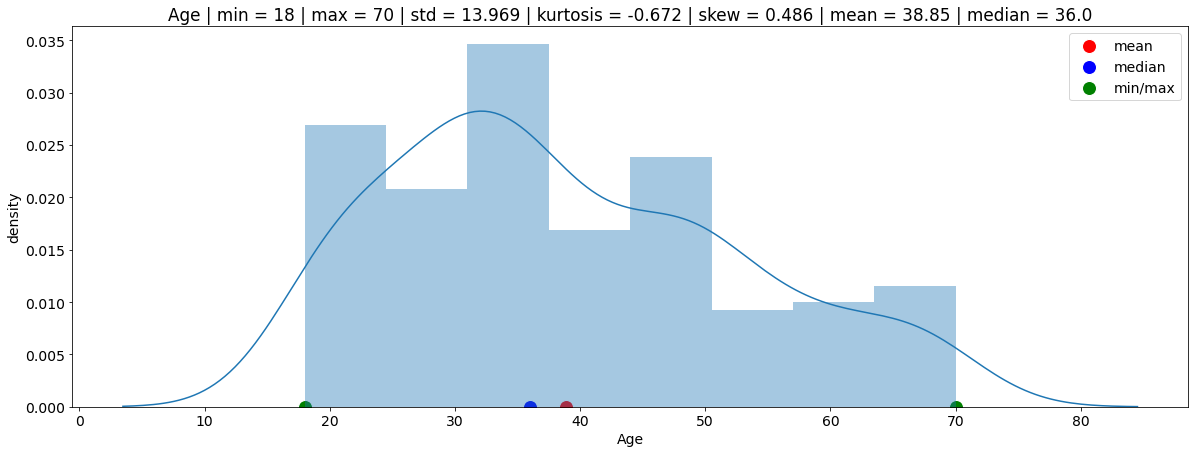

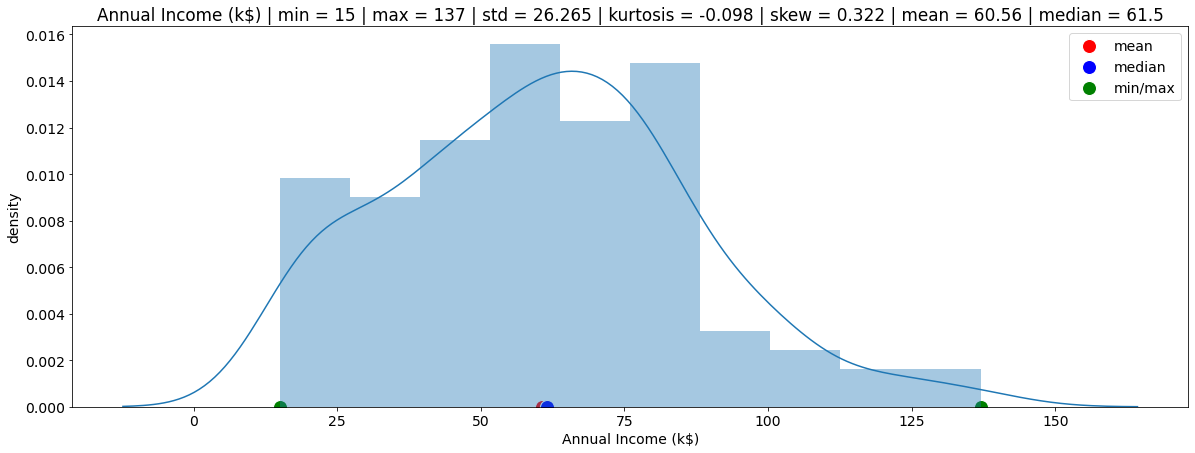

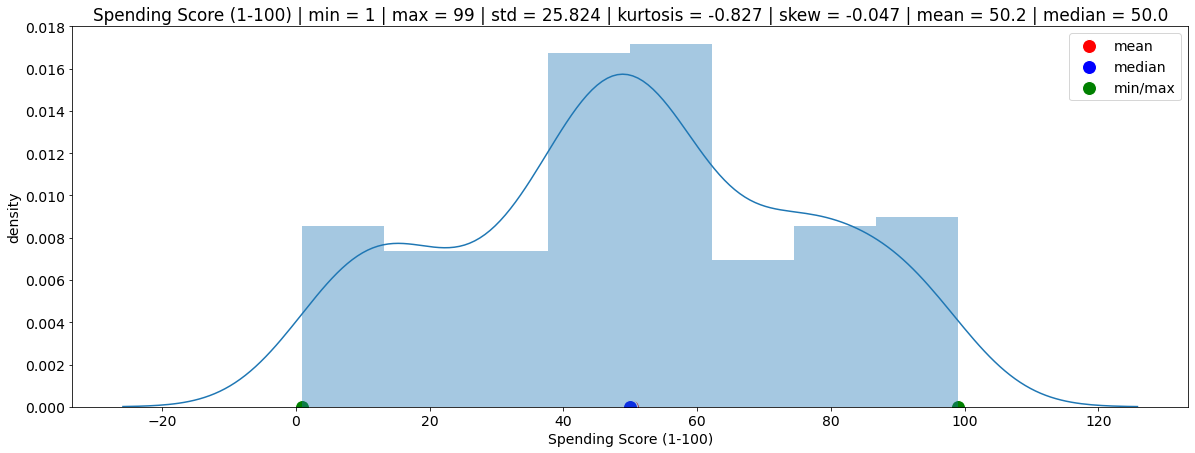

In [7]:
for i in cont_cols:
    uni_cont(df[[i]])

#### OUTLIER

In [8]:
def outlier(df):
    plt.figure(figsize =(5, 5))
    IQR = df.quantile(0.75) - df.quantile(0.25)
    MAX = df.quantile(0.75) + (1.5 * IQR)
    MIN = df.quantile(0.25) - (1.5 * IQR)
    plt.title(i + "  |  outliers = " + str(round(df[(df[[i]] > MAX) | (df[[i]] < MIN)].count()[0] / len(df) * 100, 2)) + "%")
    plt.boxplot(df[i])

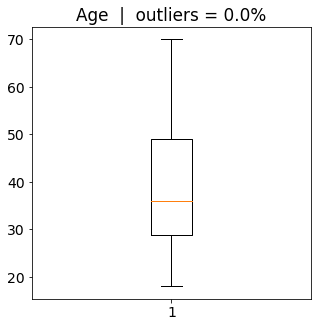

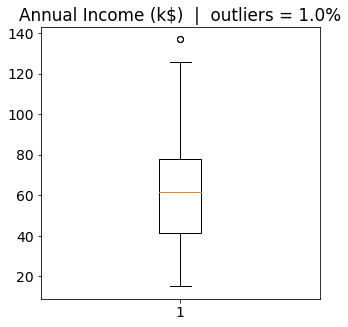

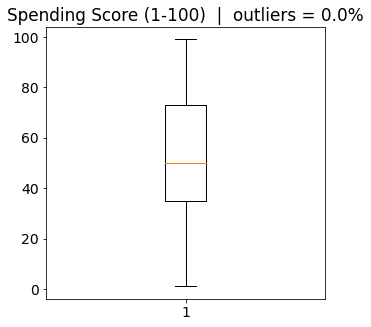

In [9]:
for i in cont_cols:
    outlier(df[[i]])

#### UNIVARIATE CATEGORICAL

In [10]:
def uni_cat(df):
    plt.figure(figsize=(20, 5))
    summary = pd.DataFrame(df.groupby(df.columns[1])[df.columns[0]].count())
    summary.reset_index(inplace = True)
    b = sns.barplot(list(summary.values[:,0]), list(summary.values[:,1]))
    for index, row in summary.iterrows():
        b.text(row.name, row[df.columns[0]], str(row[df.columns[0]]) + " : " + str(round((row[df.columns[0]]*100)/df.shape[0], 2)) + "%", color='black', ha="center")
    plt.title(df.columns[1])
    plt.xlabel(df.columns[1])
    plt.ylabel('count')
    plt.show()

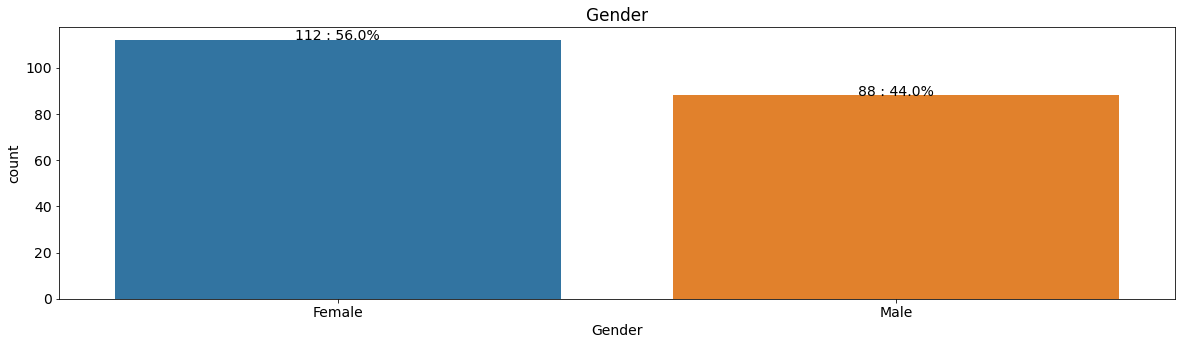

In [11]:
for i in cat_cols:
    uni_cat(df[['CustomerID', i]])

## 3.2 BIVARIATE ANALYSIS

#### CONTINOUS - CONTINOUS

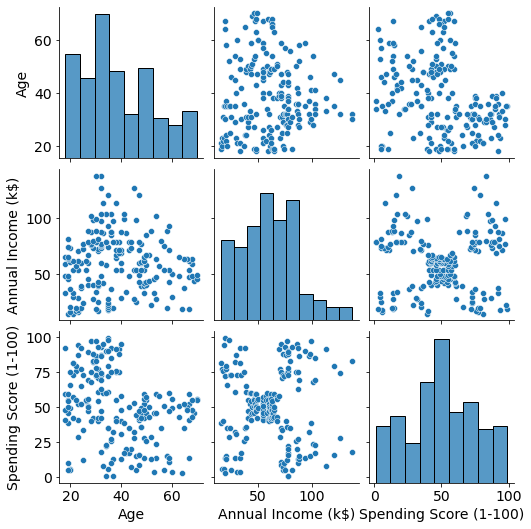

In [12]:
sns.pairplot(df[cont_cols])

#### CONTINOUS - CATEGORICAL

In [13]:
def cont_cat(df):
    plt.figure(figsize=(20, 5))
    summary = pd.DataFrame(df.groupby(df.columns[1])[df.columns[0]].median())
    summary.reset_index(inplace = True)
    b = sns.barplot(list(summary.values[:,0]), list(summary.values[:,1]))
    for index, row in summary.iterrows():
        b.text(row.name, row[i], round(row[i], 2), color='black', ha="center")
    plt.title(df.columns[0] + " vs " + df.columns[1])
    plt.xlabel(df.columns[1])
    plt.ylabel(df.columns[0])
    plt.show()

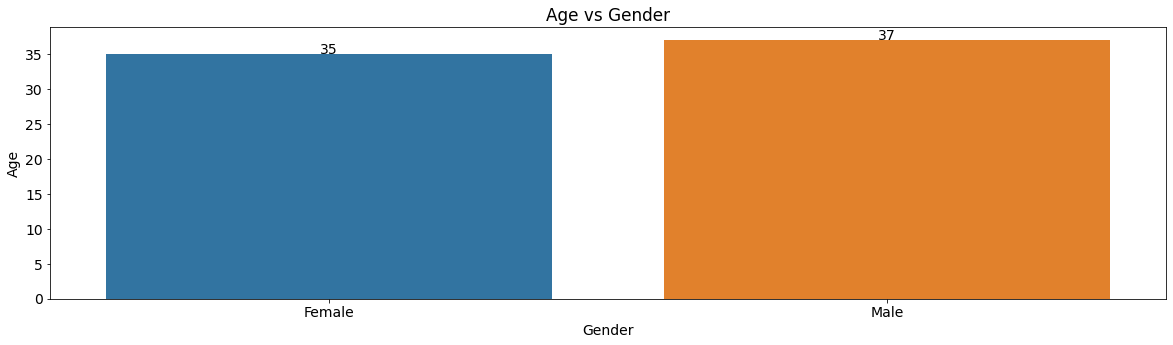

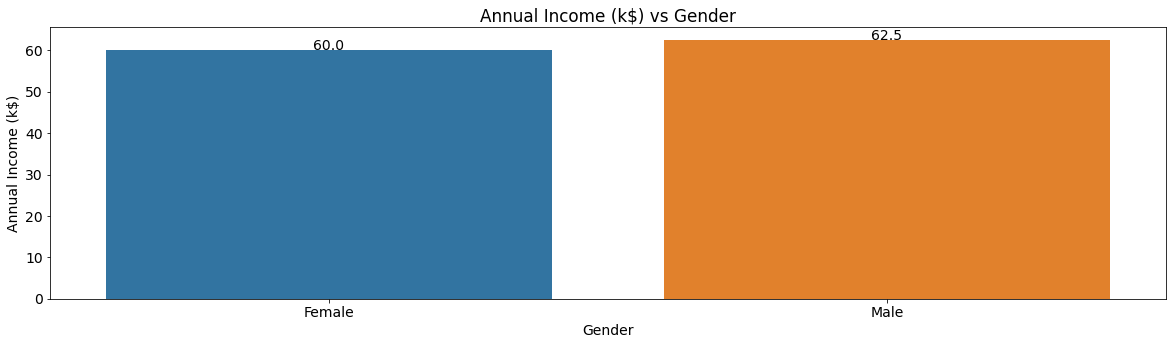

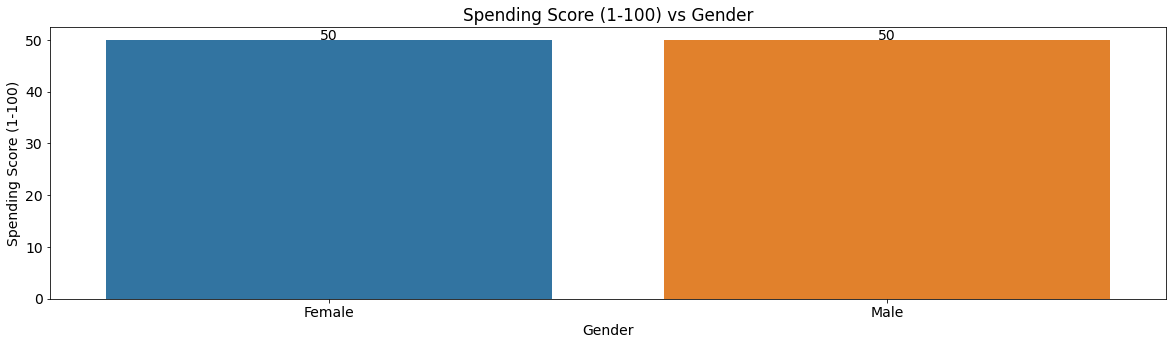

In [14]:
for i in cont_cols:
    cont_cat(df[[i, "Gender"]])

In [15]:
def cont_cat_violin(df):
    plt.figure(figsize=(20, 5))
    sns.violinplot(x = df.columns[0], y = df.columns[1], data = df , palette = 'vlag')
    sns.swarmplot(x = df.columns[0], y = df.columns[1], data = df)
    plt.title(df.columns[0] + " vs " + df.columns[1])
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.show()

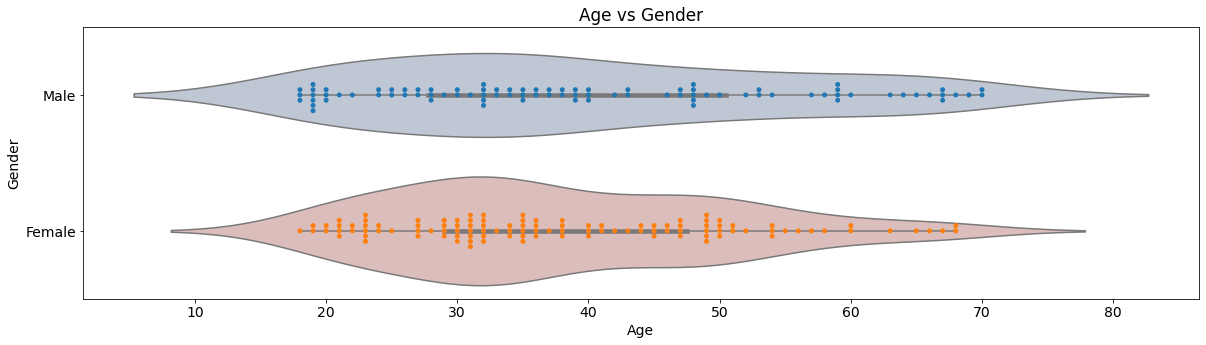

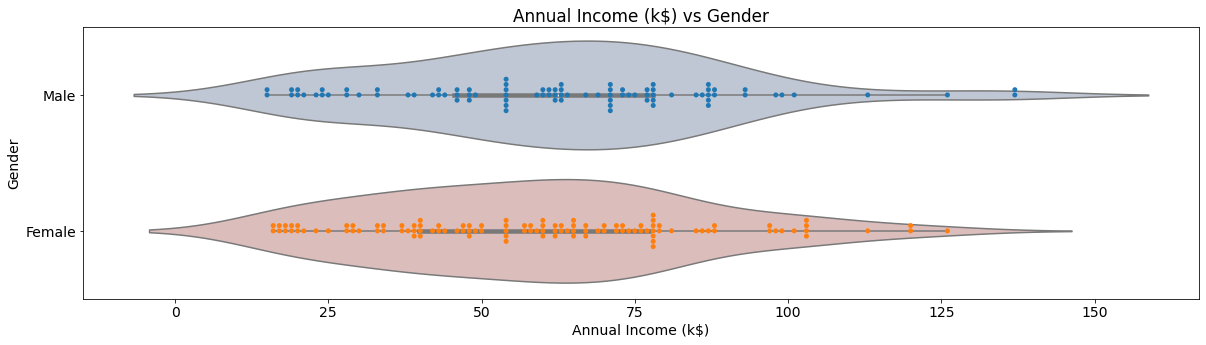

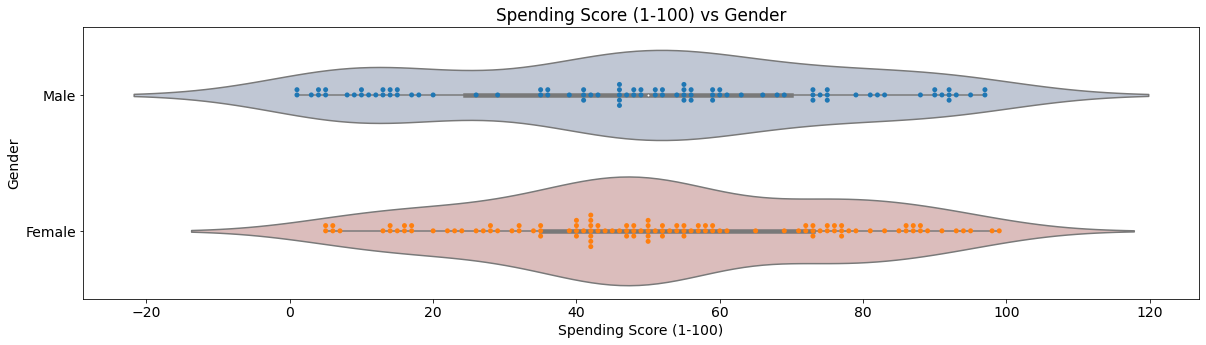

In [16]:
for i in cont_cols:
    cont_cat_violin(df[[i, "Gender"]])

## 3.3 MULTIVARIATE

In [17]:
def multi(df):
    plt.figure(figsize=(20, 5))
    sns.scatterplot(x = df.columns[0], y = df.columns[1], data = df, hue = df.columns[2], s = 100, alpha = 0.5)
    plt.title(df.columns[0] + " vs " + df.columns[1] + " vs " + df.columns[2])
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.show()

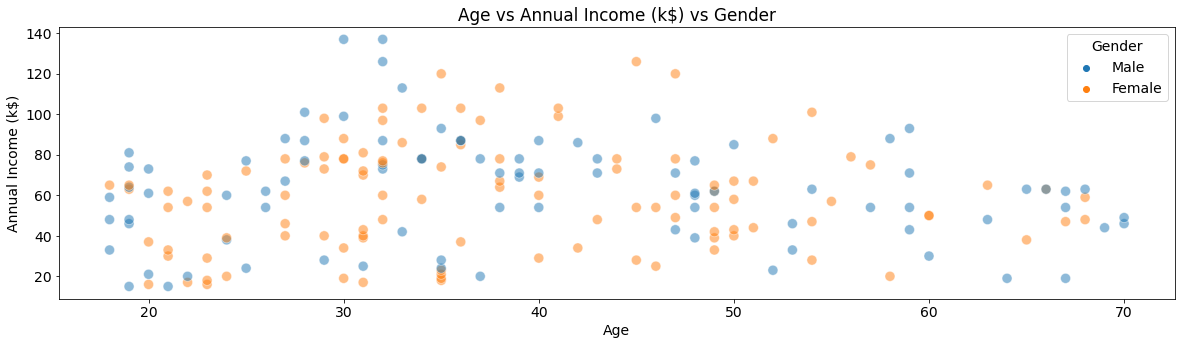

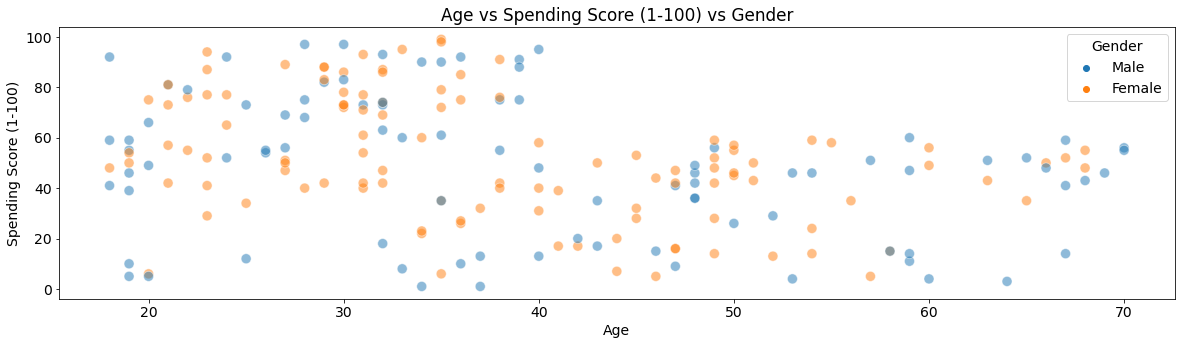

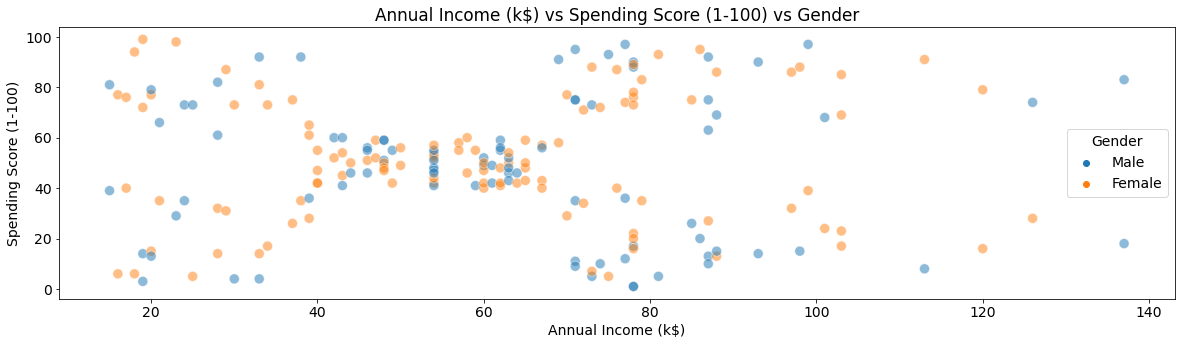

In [18]:
for i in range(0, len(cont_cols)):
    for j in range(i+1, len(cont_cols)):
        multi(df[[cont_cols[i], cont_cols[j], "Gender"]])

# 4. FEATURE TRANSFORMATION

In [39]:
# ENCODING GENDER
df.Gender = df.Gender.map({'Male':1, 'Female': 0})

In [40]:
# DROPPING ID
df.drop('CustomerID', axis=1, inplace=True)

#### REDUCING FEATURE SPACE

In [21]:
#pca = PCA(n_components = df.shape[1]).fit(df)

In [22]:
#explained_variance = np.round(pca.explained_variance_ratio_, 3)#[:3].sum()

In [23]:
#cum_sum_eigenvalues = np.cumsum(explained_variance)

In [37]:
#plt.bar(range(0, len(explained_variance)), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
#plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
#plt.ylabel('Explained variance ratio')
#plt.xlabel('Principal component index')
#plt.legend(loc='best')
#plt.tight_layout()
#plt.show()

#### FIRST 3 GENERATED FEATURES REPRESENT VARIANCE OF ALL THE FEATURES

In [41]:
# new_df = pca.transform(df)[:,:3]

# 5. MODEL SELECTION

In [26]:
def optimal_clusters(df):
    inertia = []
    for n in range(1 , 11):
        algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10 , max_iter=300, tol=0.0001, random_state=111, 
                           algorithm='elkan')
        algorithm.fit(df)
        inertia.append(algorithm.inertia_)
        
    plt.figure(1 , figsize = (15 ,6))
    plt.plot(np.arange(1 , 11) , inertia , 'o')
    plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

In [57]:
def segmentation(df, n):
    
    algorithm = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001,random_state=111, algorithm='elkan')
    algorithm.fit(df)
    labels1 = algorithm.labels_
    centroids1 = algorithm.cluster_centers_

    h = 0.02
    x_min, x_max = df[df.columns[0]].min() - 1, df[df.columns[0]].max() + 1
    y_min, y_max = df[df.columns[1]].min() - 1, df[df.columns[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

    plt.figure(1 , figsize = (15 , 7) )
    plt.clf()
    Z = Z.reshape(xx.shape)
    plt.imshow(Z , interpolation='nearest', 
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Pastel2, aspect='auto', origin='lower')

    plt.scatter(x=df.columns[0], y=df.columns[1], data=df, c=labels1, s=200)
    plt.scatter(x=centroids1[: , 0] , y=centroids1[: , 1] , s=300 , c='red', alpha=0.5)
    plt.ylabel(df.columns[1])
    plt.xlabel(df.columns[0])
    plt.show()

### SEGMENTATION USING AGE & INCOME

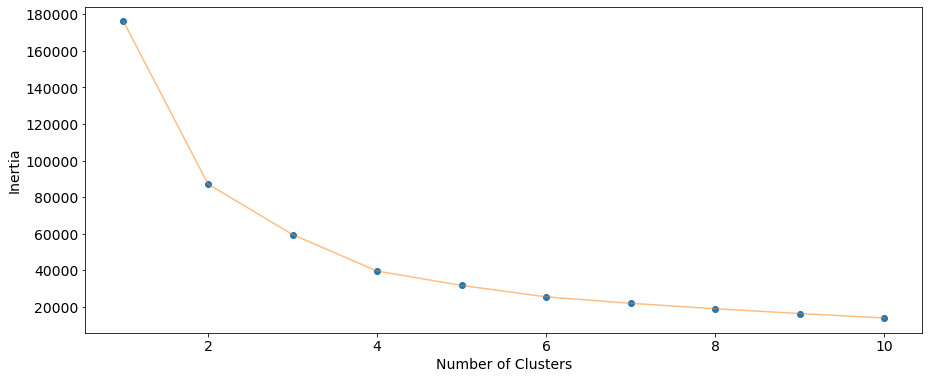

In [61]:
optimal_clusters(df[["Age", "Annual Income (k$)"]])

#### 4 CLUSTERS ARE OPTIMAL

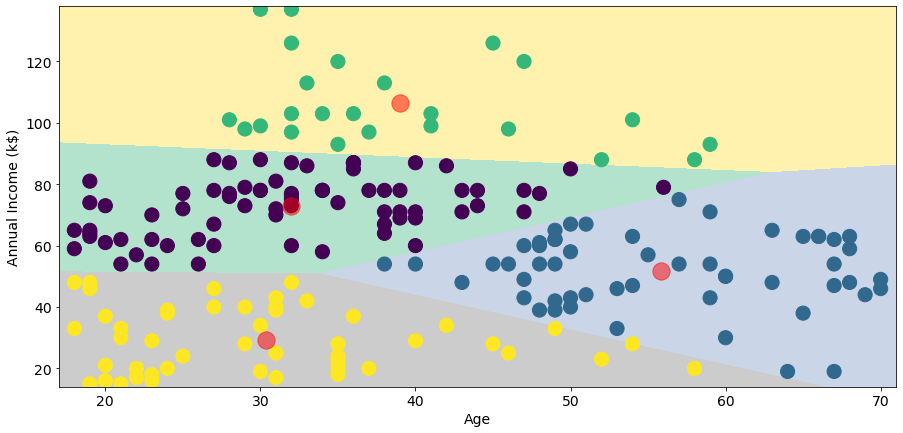

In [62]:
segmentation(df[["Age",  "Annual Income (k$)"]], 4)

### SEGMENTATION USING AGE & SPENDING SCORE

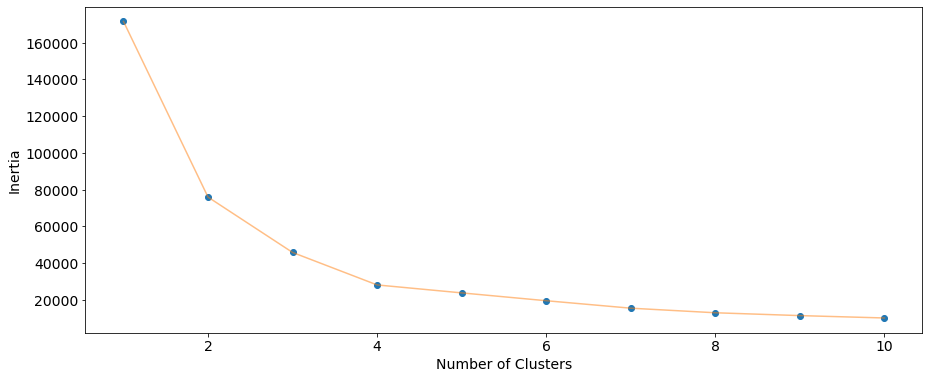

In [63]:
optimal_clusters(df[["Age",  "Spending Score (1-100)"]])

#### 4 CLUSTERS ARE OPTIMAL

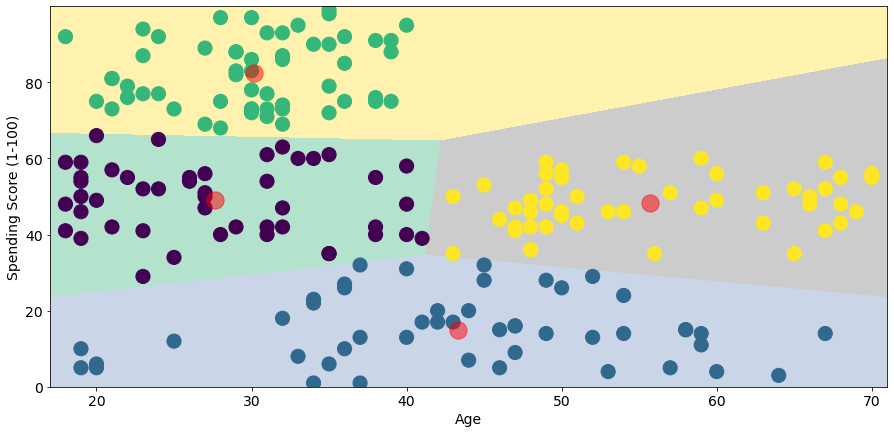

In [64]:
segmentation(df[["Age",  "Spending Score (1-100)"]], 4)

### SEGMENTATION USING INCOME & SPENDING SCORE

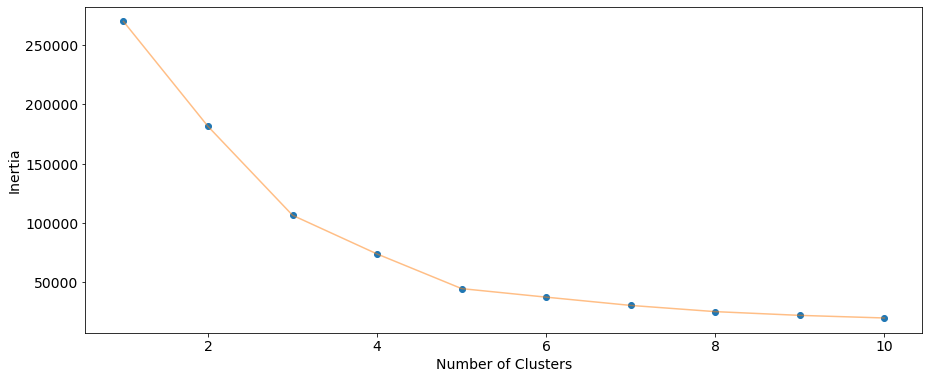

In [65]:
optimal_clusters(df[["Annual Income (k$)", "Spending Score (1-100)"]])

#### 5 CLUSTERS ARE OPTIMAL

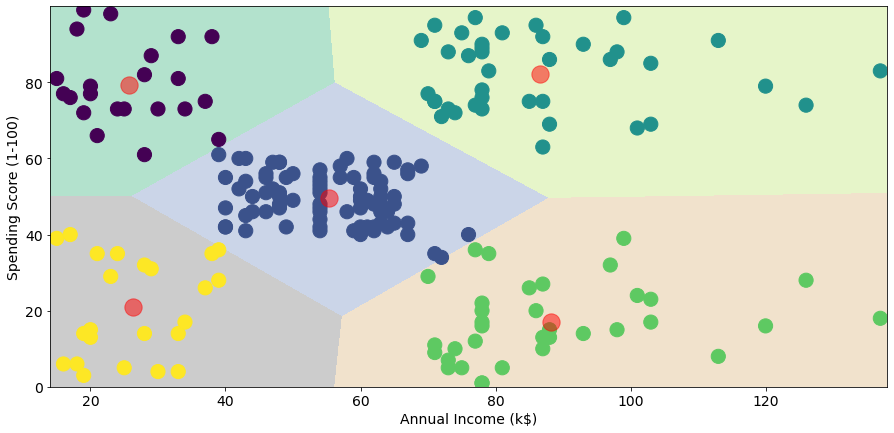

In [66]:
segmentation(df[["Annual Income (k$)", "Spending Score (1-100)"]], 5)

### SEGMENTATION USING ALL

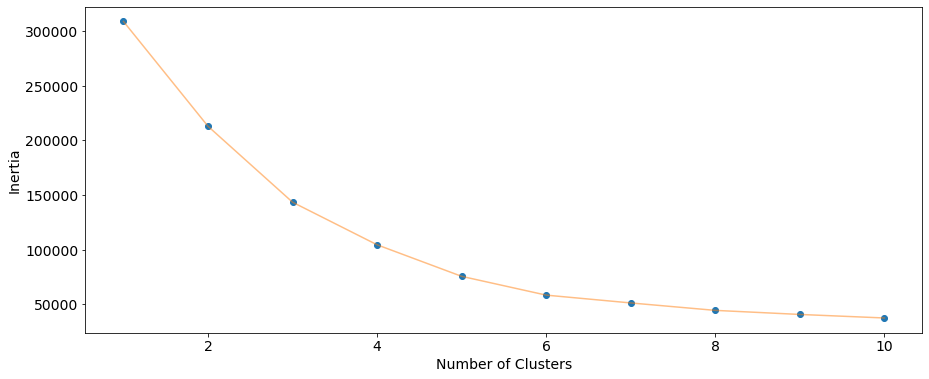

In [67]:
optimal_clusters(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

#### 6 CLUSTERS ARE OPTIMAL

In [68]:
algorithm = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
algorithm.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [69]:
trace1 = go.Scatter3d(
    x= df['Age'],
    y = df['Annual Income (k$)'],
    z = df['Spending Score (1-100)'],
    mode='markers',
    marker=dict(
        color = labels1, 
        size = 10,
        line = dict(
            color = labels1,
            width = 20
        ),
        opacity = 0.8
     )
)
data = [trace1]
layout = go.Layout(
    title = 'Clusters',
    scene = dict(
            xaxis = {'title': 'Age'},
            yaxis = {'title': 'Annual Income (k$)'},
            zaxis = {'title': 'Spending Score (1-100)'}
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)